In [8]:
import tensorflow as tf
import numpy as np

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Определяем модель нейронной сети
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(64,)),
  tf.keras.layers.Dense(64, activation='sigmoid'),
  tf.keras.layers.Dense(5, activation='sigmoid'),
])

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Компилируем модель
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [31]:
from spectrum import font, font_ids, test_labels

train_data = []

font_len = len(font_ids)
for i in range(font_len):
  train_data.append(font[font_ids[i]])

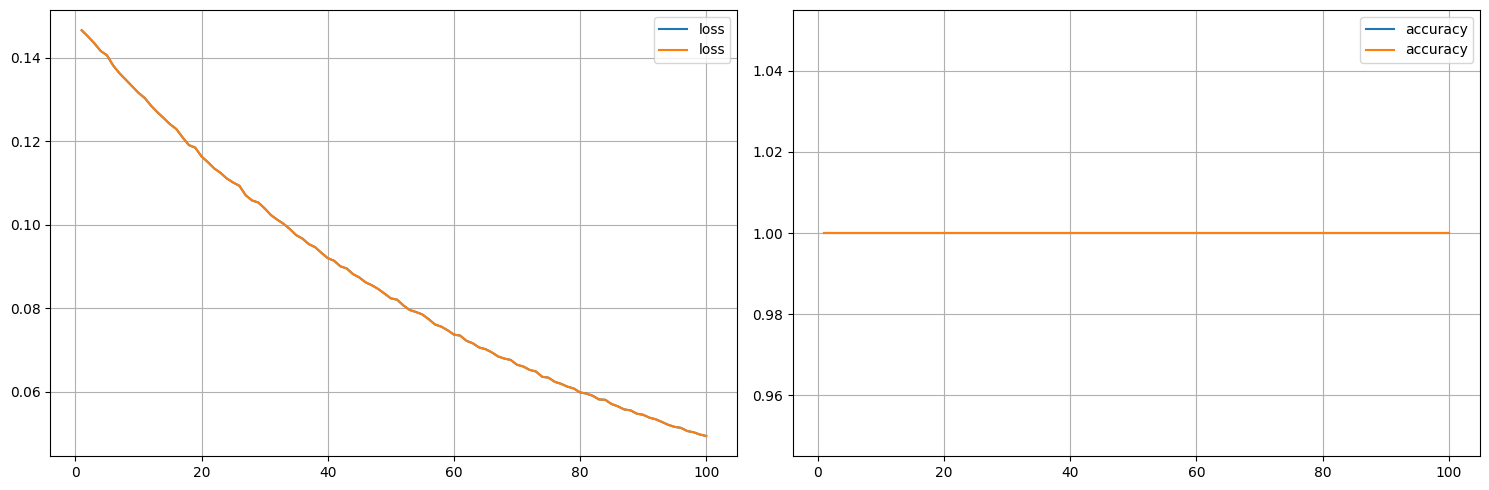

8/8 [==============================] - 0s 33ms/step - loss: 0.0494 - accuracy: 1.0000


In [17]:
from plot_learning import PlotLearning

model.fit(train_data, test_labels, epochs=100, batch_size=1, callbacks=[PlotLearning()])

In [30]:
from colors import bcolors as bc

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

test_count = len(font_ids)
for i in range(test_count):
  input_data = np.expand_dims(font[font_ids[i]], axis=0)
  predictions = probability_model.predict(input_data)
  print(f'{bc.OKBLUE}predictions{bc.ENDC}', predictions)

  index = np.argmax(predictions)
  is_true = index == test_labels[i]
  print(
    'with prediction =',
    f'{bc.BOLD}{bc.OKGREEN if is_true else bc.FAIL}{predictions[0][index]}{bc.ENDC}',
    'it\'s letter',
    f'{bc.BOLD}{bc.OKGREEN if is_true else bc.FAIL}{font_ids[index]}{bc.ENDC}'
  )

1/1 [==============================] - 0s 40ms/step
predictions [[0.34446475 0.14014025 0.14268242 0.1699329  0.20277968]]
with prediction = 0.3444647490978241 it's letter Z
1/1 [==============================] - 0s 16ms/step
predictions [[0.1371616  0.33532435 0.20507635 0.15316373 0.16927403]]
with prediction = 0.33532434701919556 it's letter S
1/1 [==============================] - 0s 17ms/step
predictions [[0.13589077 0.19929768 0.32811928 0.18252446 0.15416788]]
with prediction = 0.32811927795410156 it's letter B
1/1 [==============================] - 0s 17ms/step
predictions [[0.15653263 0.15465868 0.18036366 0.3429842  0.16546087]]
with prediction = 0.3429841995239258 it's letter E
1/1 [==============================] - 0s 17ms/step
predictions [[0.16058499 0.15010537 0.14053094 0.19138686 0.3573919 ]]
with prediction = 0.357391893863678 it's letter r1
1/1 [==============================] - 0s 17ms/step
predictions [[0.15458995 0.15427934 0.15553585 0.1518773  0.38371757]]
with 